In [1]:
import math
import collections
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
pd.options.display.max_rows = 10

In [3]:
path = os.getcwd()
path

'C:\\Users\\Nasim\\Documents\\Heriot Watt Uni\\Dissertation\\Analysis'

In [218]:
incident_df = pd.read_csv('incident_df_gt.csv')

In [219]:
incident_df = incident_df.loc[(incident_df['RELEASE_TYPE'] == 'RUPTURE')]

In [40]:
#incident_df = incident_df.set_index('IYEAR')

In [220]:
incident_df

,IYEAR,DATAFILE_AS_OF,SIGNIFICANT,SERIOUS,SYSTEM_TYPE,REPORT_NUMBER,SUPPLEMENTAL_NUMBER,REPORT_RECEIVED_DATE,REPORT_TYPE,OPERATOR_ID,...,AUTHORIZER_EMAIL,NARRATIVE,Installation_Decade,Diameter_Range,SMYS_Range,Hoop_Stress,SMYS%,SMYS_Cat,CP_Types,ign_expl
0,2010,2021-11-30 10:22:41,YES,NO,GT (Gas Transmission),20100002,15077,2010-03-12 14:42:51,SUPPLEMENTAL FINAL,18516,...,ken.peters@elpaso.com,ON JANUARY 6 2010 SOUTHERN NATURAL GAS (SNG) C...,1950s,20<d<=28,NaN,36000.000000,0.692308,60%-72%,CPC,Not Ignited
2,2010,2021-11-30 10:22:41,NO,NO,GT (Gas Transmission),20100012,15129,2010-04-07 11:27:09,SUPPLEMENTAL FINAL,1007,...,bruce_hancock@kindermorgan.com,A METALLURGICAL ANALYSIS OF THE FAILURE WAS CO...,1940s,10<d<=20,NaN,23040.000000,0.658286,60%-72%,NaN,Not Ignited
3,2010,2021-11-30 10:22:41,YES,NO,GT (Gas Transmission),20100013,15036,2010-04-08 11:26:14,SUPPLEMENTAL FINAL,12696,...,ngray@eprod.com,"ON MARCH 22, 2010, LOCAL OPERATING PERSONNEL W...",1950s,10<d<=20,NaN,21000.000000,0.500000,40%-50%,CPC,Not Ignited
4,2010,2021-11-30 10:22:41,YES,NO,GT (Gas Transmission),20100014,17098,2010-04-09 17:54:38,SUPPLEMENTAL FINAL,31286,...,wesley.dunbar@oneok.com,ONEOK GAS TRANPORTATION A-26 26INCH PIPELINE R...,1950s,20<d<=28,NaN,31200.000000,0.600000,50%-60%,CPC,Ignited Only
15,2010,2021-11-30 10:22:41,YES,NO,GT (Gas Transmission),20100050,16095,2010-08-27 11:41:45,SUPPLEMENTAL FINAL,32099,...,danny.nichols@energytransfer.com,"ETC EXPERIENCED A RUPTURE ON THE 36"" OASIS PIP...",1970s,28<d,NaN,43150.684932,0.719178,60%-72%,NaN,Not Ignited
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,2020,2021-11-30 10:22:41,YES,NO,GT (Gas Transmission),20200110,35519,2020-10-22 17:52:40,SUPPLEMENTAL,13120,...,jaime_hernandez@kindermorga.com,"ON SEPTEMBER 24, 2020 THE NATURAL GAS PIPELINE...",1960s,10<d<=20,NaN,42553.191489,0.709220,60%-72%,CPC,Not Ignited
419,2020,2021-11-30 10:22:41,YES,NO,GT (Gas Transmission),20200112,35005,2020-10-23 22:42:25,SUPPLEMENTAL FINAL,5304,...,todd.nardozzi@energytransfer.com,"AT ~9:48 EDT ON 9/24/2020, LOCAL OPERATIONS PE...",1950s,10<d<=20,NaN,31176.000000,0.599538,50%-60%,NaN,Not Ignited
420,2020,2021-11-30 10:22:41,YES,NO,GT (Gas Transmission),20200116,35247,2020-11-02 17:57:45,SUPPLEMENTAL FINAL,31451,...,jaime_hernandez@kindermorgan.com,"ON OCTOBER 4, 2020 THE KINDER MORGAN TEXAS PIP...",1980s,20<d<=28,NaN,25534.020619,0.425567,40%-50%,NaN,Not Ignited
424,2020,2021-11-30 10:22:41,YES,NO,GT (Gas Transmission),20210006,34995,2021-01-14 07:59:35,SUPPLEMENTAL FINAL,602,...,casey.roberts@enablemidstream.com,"ON DECEMBER 18TH, 2020 AT 15:22 ENABLE GAS TRA...",1940s,10<d<=20,NaN,7692.307692,0.167224,Less than 20%,NaN,Not Ignited


In [35]:
mileage_df = pd.read_csv('mileage_df_gt.csv')

In [57]:
mileage_df = mileage_df.set_index('Year')

In [59]:
mileage_df.index

Int64Index([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], dtype='int64', name='Year')

In [221]:
#calculating rupture rates pipelines (no attributes)
incident_total = pd.DataFrame()

#Total incidents
for n in range(0, 11):
    incident_total = incident_total.append({'Year': int(2010+n), 'Total': len(incident_df.loc[incident_df['IYEAR'] == 2010+n]), 
                                            'Excavation Damage': len(incident_df.loc[(incident_df['MAP_CAUSE'] == 'EXCAVATION DAMAGE') & (incident_df['IYEAR'] == 2010+n)]), 
                                           'Corrosion': len(incident_df.loc[(incident_df['MAP_CAUSE'] == 'CORROSION') & (incident_df['IYEAR'] == 2010+n)]), 
                                           'Incorrect Operations': len(incident_df.loc[(incident_df['MAP_CAUSE'] == 'INCORRECT OPERATION') & (incident_df['IYEAR'] == 2010+n)]), 
                                           'All Other Causes': len(incident_df.loc[(incident_df['MAP_CAUSE'] == 'ALL OTHER CAUSES') & (incident_df['IYEAR'] == 2010+n)]), 
                                           'Material Failure': len(incident_df.loc[(incident_df['MAP_CAUSE'] == 'MATERIAL/WELD/EQUIP FAILURE') & (incident_df['IYEAR'] == 2010+n)]), 
                                            'Natural Force Damage': len(incident_df.loc[(incident_df['MAP_CAUSE'] == 'NATURAL FORCE DAMAGE') & (incident_df['IYEAR'] == 2010+n)]), 
                                           'Other Outside Forces': len(incident_df.loc[(incident_df['MAP_CAUSE'] == 'OTHER OUTSIDE FORCE DAMAGE') & (incident_df['IYEAR'] == 2010+n)]),}, ignore_index=True) 


In [222]:
incident_total = incident_total.set_index('Year')

In [223]:
incident_total['Total_rate'] = incident_total['Total']/mileage_df['Total_km']
incident_total['All Other Causes_rate'] = incident_total['All Other Causes']/mileage_df['Total_km']
incident_total['Corrosion_rate'] = incident_total['Corrosion']/mileage_df['Total_km']
incident_total['Excavation Damage_rate'] = incident_total['Excavation Damage']/mileage_df['Total_km']

incident_total['Incorrect Operations_rate'] = incident_total['Incorrect Operations']/mileage_df['Total_km']
incident_total['Material Failure_rate'] = incident_total['Material Failure']/mileage_df['Total_km']

incident_total['Natural Force Damage_rate'] = incident_total['Natural Force Damage']/mileage_df['Total_km']
incident_total['Other Outside Forces_rate'] = incident_total['Other Outside Forces']/mileage_df['Total_km']

In [401]:
incident_total_average = incident_total.mean(0)

In [285]:
incident_total.to_csv('Results\\incident_total_gt.csv')

In [402]:
incident_total_average[['Excavation Damage_rate', 'Corrosion_rate', 'Material Failure_rate', 
                        'Natural Force Damage_rate', 'Other Outside Forces_rate', 'Incorrect Operations_rate', 
                        'All Other Causes_rate']]


Excavation Damage_rate       3.038323e-06
Corrosion_rate               8.747761e-06
Material Failure_rate        9.500541e-06
Natural Force Damage_rate    2.473213e-06
Other Outside Forces_rate    1.329738e-06
Incorrect Operations_rate    1.896207e-07
All Other Causes_rate        5.757361e-07
dtype: float64

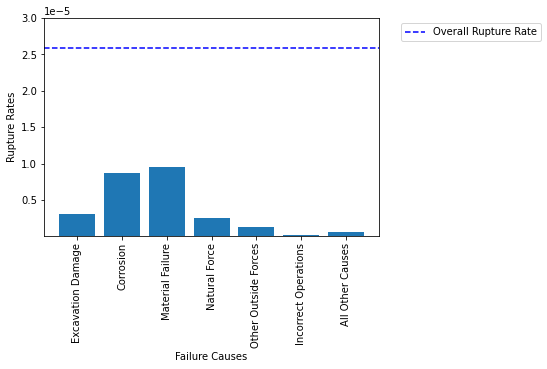

In [404]:
#Stacked bar graph

windth = 10
fig, ax = plt.subplots()

labels = ['Excavation Damage', 'Corrosion', 'Material Failure', 
                        'Natural Force', 'Other Outside Forces', 'Incorrect Operations', 
                        'All Other Causes']

values = incident_total_average[['Excavation Damage_rate', 'Corrosion_rate', 'Material Failure_rate', 
                        'Natural Force Damage_rate', 'Other Outside Forces_rate', 'Incorrect Operations_rate', 
                        'All Other Causes_rate']]

a = ax.bar(labels, values.values , align = 'center' ) 
b = ax.axhline(y=incident_total_average['Total_rate'] , color='b', linestyle='--')

b.set_label('Overall Rupture Rate')

#xticks 
plt.xticks(rotation=90) 

#x-axis labels 
plt.xlabel('Failure Causes') 


#y-axis labels 
plt.ylabel('Rupture Rates') 
plt.ylim(bottom = 0.0000001, top=0.00003)
plt.ticklabel_format(axis= 'y', style = 'sci', scilimits=(0,0))


#plot title 
#plt.title('Ditribution of Incidents by Installation Year') 

#Legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

#adding Percentage values on the graph
#plt.xticks(rotation=90)  
#for n in a:
   #height = n.get_height()
   #plt.text(x=n.get_x() + n.get_width() / 2, y=height+.70, s="{}%".format(height), ha='center')

#save plot 
plot_path = os.getcwd() + '\\GT Rates Plots\\Total_rates'
plt.savefig(plot_path, dpi=300,bbox_inches='tight')         
        
#display 
plt.show();

In [108]:
incident_total_average['Total_rate']

2.5321106046177225e-05

In [227]:
#calculating rupture rates based on cp
incident_cp = pd.DataFrame()

#Total incidents
for n in range(0, 11):
    incident_cp= incident_cp.append({'Year': 2010+n, 'CPC': len(incident_df.loc[(incident_df['CP_Types'] == 'CPC') & (incident_df['IYEAR'] == 2010+n)]), 
                                            'CPB': len(incident_df.loc[(incident_df['CP_Types'] == 'CPB') & (incident_df['IYEAR'] == 2010+n)]), 
                                           'CUC': len(incident_df.loc[(incident_df['CP_Types'] == 'CUC') & (incident_df['IYEAR'] == 2010+n)]), 
                                           'CUB': len(incident_df.loc[(incident_df['CP_Types'] == 'CUB') & (incident_df['IYEAR'] == 2010+n)])}, ignore_index=True) 


In [287]:
#calculating rupture rates based on cp
incident_cp_ext = pd.DataFrame()

#Total incidents
for n in range(0, 11):
    incident_cp_ext= incident_cp_ext.append({'Year': 2010+n, 'CPC': len(incident_df.loc[(incident_df['CP_Types'] == 'CPC') & (incident_df['MAP_SUBCAUSE'] == 'EXTERNAL') & (incident_df['IYEAR'] == 2010+n)]), 
                                            'CPB': len(incident_df.loc[(incident_df['CP_Types'] == 'CPB') & (incident_df['MAP_SUBCAUSE'] == 'EXTERNAL') & (incident_df['IYEAR'] == 2010+n)]), 
                                           'CUC': len(incident_df.loc[(incident_df['CP_Types'] == 'CUC') & (incident_df['MAP_SUBCAUSE'] == 'EXTERNAL') & (incident_df['IYEAR'] == 2010+n)]), 
                                           'CUB': len(incident_df.loc[(incident_df['CP_Types'] == 'CUB') & (incident_df['MAP_SUBCAUSE'] == 'EXTERNAL') & (incident_df['IYEAR'] == 2010+n)])}, ignore_index=True) 


In [228]:
incident_cp = incident_cp.set_index('Year')

In [289]:
incident_cp_ext = incident_cp_ext.set_index('Year')

In [229]:
incident_cp['CPC_rate'] = incident_cp['CPC']/mileage_df['cpc']
incident_cp['CPB_rate'] = incident_cp['CPB']/mileage_df['cpb']
incident_cp['CUC_rate'] = incident_cp['CUC']/mileage_df['cuc']
incident_cp['CUB_rate'] = incident_cp['CUB']/mileage_df['cub']

In [290]:
incident_cp_ext['CPC_rate'] = incident_cp_ext['CPC']/mileage_df['cpc']
incident_cp_ext['CPB_rate'] = incident_cp_ext['CPB']/mileage_df['cpb']
incident_cp_ext['CUC_rate'] = incident_cp_ext['CUC']/mileage_df['cuc']
incident_cp_ext['CUB_rate'] = incident_cp_ext['CUB']/mileage_df['cub']

In [230]:
incident_cp_average = incident_cp.mean(0)

In [291]:
incident_cp_ext_average = incident_cp_ext.mean(0)

In [341]:
incident_cp_average

CPB         0.090909
CPC         2.272727
CUB         0.181818
CUC         0.090909
CPC_rate    0.000005
CPB_rate    0.000013
CUC_rate    0.000241
CUB_rate    0.000127
dtype: float64

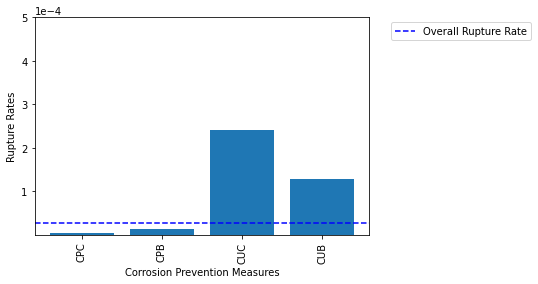

In [405]:
#Stacked bar graph

n = len(['CPC', 'CPB', 'CUC','CUB'])
x = np.arange(n)  # the label locations
width = 0.35
fig, ax = plt.subplots()

labels = ['CPC', 'CPB', 'CUC','CUB']

values = incident_cp_average[['CPC_rate', 'CPB_rate', 'CUC_rate','CUB_rate']]
values_ext = incident_cp_ext_average[['CPC_rate', 'CPB_rate', 'CUC_rate','CUB_rate']]

a = ax.bar(x, values.values) 
b = ax.axhline(y=incident_total_average['Total_rate'] , color='b', linestyle='--')
#c = ax.bar(x + width, values_ext.values, width) 


b.set_label('Overall Rupture Rate')

#xticks 
#plt.xticks(rotation=90) 
plt.xticks(x, labels, rotation = 90)

#x-axis labels 
plt.xlabel('Corrosion Prevention Measures') 


#y-axis labels 
plt.ylabel('Rupture Rates') 
plt.ylim(bottom = 0.0000001, top=0.0005)
plt.ticklabel_format(axis= 'y', style = 'sci', scilimits=(0,0))


#plot title 
#plt.title('Ditribution of Incidents by Installation Year') 

#Legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

#adding Percentage values on the graph
#plt.xticks(rotation=90)  
#for n in a:
   #height = n.get_height()
   #plt.text(x=n.get_x() + n.get_width() / 2, y=height+.70, s="{}%".format(height), ha='center')

#save plot 
plot_path = os.getcwd() + '\\GT Rates Plots\\cp_rates'
plt.savefig(plot_path, dpi=300,bbox_inches='tight')         
        
#display 
plt.show();

In [286]:
incident_cp_average[['CPC_rate', 'CPB_rate', 'CUC_rate','CUB_rate']]

CPC_rate    0.000005
CPB_rate    0.000013
CUC_rate    0.000241
CUB_rate    0.000127
dtype: float64

In [234]:
#calculating rupture rates based on installation decade
incident_installation = pd.DataFrame()

#Total incidents
for n in range(0, 11):
    incident_installation= incident_installation.append({'Year': 2010+n, 'Pre 1940': len(incident_df.loc[(incident_df['Installation_Decade'] == 'Pre 1940') & (incident_df['IYEAR'] == 2010+n)]), 
                                            '1940s': len(incident_df.loc[(incident_df['Installation_Decade'] == '1940s') & (incident_df['IYEAR'] == 2010+n)]), 
                                           '1950s': len(incident_df.loc[(incident_df['Installation_Decade'] == '1950s') & (incident_df['IYEAR'] == 2010+n)]), 
                                           '1960s': len(incident_df.loc[(incident_df['Installation_Decade'] == '1960s') & (incident_df['IYEAR'] == 2010+n)]), 
                                            '1970s': len(incident_df.loc[(incident_df['Installation_Decade'] == '1970s') & (incident_df['IYEAR'] == 2010+n)]), 
                                            '1980s': len(incident_df.loc[(incident_df['Installation_Decade'] == '1980s') & (incident_df['IYEAR'] == 2010+n)]), 
                                            '1990s': len(incident_df.loc[(incident_df['Installation_Decade'] == '1990s') & (incident_df['IYEAR'] == 2010+n)]), 
                                            '2000s': len(incident_df.loc[(incident_df['Installation_Decade'] == '2000s') & (incident_df['IYEAR'] == 2010+n)]), 
                                            '2010s': len(incident_df.loc[(incident_df['Installation_Decade'] == '2010s') & (incident_df['IYEAR'] == 2010+n)])}, ignore_index=True) 


In [305]:
#calculating rupture rates based on installation decade for corrosion and material causes only
incident_installation_corr_mat = pd.DataFrame()

#Total incidents
for n in range(0, 11):
    incident_installation_corr_mat= incident_installation_corr_mat.append({'Year': 2010+n, 
                                                                           'Pre 1940': len(incident_df.loc[(incident_df['Installation_Decade'] == 'Pre 1940') & ((incident_df['MAP_CAUSE'] == 'MATERIAL/WELD/EQUIP FAILURE') | (incident_df['MAP_CAUSE'] == 'CORROSION')) & (incident_df['IYEAR'] == 2010+n)]), 
                                            '1940s': len(incident_df.loc[(incident_df['Installation_Decade'] == '1940s') & ((incident_df['MAP_CAUSE'] == 'MATERIAL/WELD/EQUIP FAILURE') | (incident_df['MAP_CAUSE'] == 'CORROSION')) & (incident_df['IYEAR'] == 2010+n)]), 
                                           '1950s': len(incident_df.loc[(incident_df['Installation_Decade'] == '1950s') & ((incident_df['MAP_CAUSE'] == 'MATERIAL/WELD/EQUIP FAILURE') | (incident_df['MAP_CAUSE'] == 'CORROSION')) & (incident_df['IYEAR'] == 2010+n)]), 
                                           '1960s': len(incident_df.loc[(incident_df['Installation_Decade'] == '1960s') & ((incident_df['MAP_CAUSE'] == 'MATERIAL/WELD/EQUIP FAILURE') | (incident_df['MAP_CAUSE'] == 'CORROSION')) & (incident_df['IYEAR'] == 2010+n)]), 
                                            '1970s': len(incident_df.loc[(incident_df['Installation_Decade'] == '1970s') & ((incident_df['MAP_CAUSE'] == 'MATERIAL/WELD/EQUIP FAILURE') | (incident_df['MAP_CAUSE'] == 'CORROSION')) & (incident_df['IYEAR'] == 2010+n)]), 
                                            '1980s': len(incident_df.loc[(incident_df['Installation_Decade'] == '1980s') & ((incident_df['MAP_CAUSE'] == 'MATERIAL/WELD/EQUIP FAILURE') | (incident_df['MAP_CAUSE'] == 'CORROSION')) & (incident_df['IYEAR'] == 2010+n)]), 
                                            '1990s': len(incident_df.loc[(incident_df['Installation_Decade'] == '1990s') & ((incident_df['MAP_CAUSE'] == 'MATERIAL/WELD/EQUIP FAILURE') | (incident_df['MAP_CAUSE'] == 'CORROSION')) & (incident_df['IYEAR'] == 2010+n)]), 
                                            '2000s': len(incident_df.loc[(incident_df['Installation_Decade'] == '2000s') & ((incident_df['MAP_CAUSE'] == 'MATERIAL/WELD/EQUIP FAILURE') | (incident_df['MAP_CAUSE'] == 'CORROSION')) & (incident_df['IYEAR'] == 2010+n)]), 
                                            '2010s': len(incident_df.loc[(incident_df['Installation_Decade'] == '2010s') & ((incident_df['MAP_CAUSE'] == 'MATERIAL/WELD/EQUIP FAILURE') | (incident_df['MAP_CAUSE'] == 'CORROSION')) & (incident_df['IYEAR'] == 2010+n)])}, ignore_index=True) 


In [235]:
incident_installation = incident_installation.set_index('Year')

In [306]:
incident_installation_corr_mat = incident_installation_corr_mat.set_index('Year')

In [380]:
#since no pre 1940 pipeline was reported in 2010 and 2011, the entries will be none (for calculation, otherwise deviding by zero)
mileage_df.loc[2010, 'PARTJTONPRE1940'] = None
mileage_df.loc[2011, 'PARTJTONPRE1940'] = None

In [381]:
incident_installation['Pre 1940_rate'] = incident_installation['Pre 1940']/mileage_df['PARTJTONPRE1940']
incident_installation['1940s_rate'] = incident_installation['1940s']/mileage_df['PARTJTON194049']
incident_installation['1950s_rate'] = incident_installation['1950s']/mileage_df['PARTJTON195059']
incident_installation['1960s_rate'] = incident_installation['1960s']/mileage_df['PARTJTON196069']
incident_installation['1970s_rate'] = incident_installation['1970s']/mileage_df['PARTJTON197079']
incident_installation['1980s_rate'] = incident_installation['1980s']/mileage_df['PARTJTON198089']
incident_installation['1990s_rate'] = incident_installation['1990s']/mileage_df['PARTJTON199099']
incident_installation['2000s_rate'] = incident_installation['2000s']/mileage_df['PARTJTON200009']
incident_installation['2010s_rate'] = incident_installation['2010s']/mileage_df['PARTJTON201019']

In [382]:
incident_installation_corr_mat['Pre 1940_rate'] = incident_installation_corr_mat['Pre 1940']/mileage_df['PARTJTONPRE1940']
incident_installation_corr_mat['1940s_rate'] = incident_installation_corr_mat['1940s']/mileage_df['PARTJTON194049']
incident_installation_corr_mat['1950s_rate'] = incident_installation_corr_mat['1950s']/mileage_df['PARTJTON195059']
incident_installation_corr_mat['1960s_rate'] = incident_installation_corr_mat['1960s']/mileage_df['PARTJTON196069']
incident_installation_corr_mat['1970s_rate'] = incident_installation_corr_mat['1970s']/mileage_df['PARTJTON197079']
incident_installation_corr_mat['1980s_rate'] = incident_installation_corr_mat['1980s']/mileage_df['PARTJTON198089']
incident_installation_corr_mat['1990s_rate'] = incident_installation_corr_mat['1990s']/mileage_df['PARTJTON199099']
incident_installation_corr_mat['2000s_rate'] = incident_installation_corr_mat['2000s']/mileage_df['PARTJTON200009']
incident_installation_corr_mat['2010s_rate'] = incident_installation_corr_mat['2010s']/mileage_df['PARTJTON201019']

Year
2010.0         NaN
2011.0         NaN
2012.0    0.000061
2013.0    0.000063
2014.0    0.000000
            ...   
2016.0    0.000066
2017.0    0.000000
2018.0    0.000000
2019.0    0.000073
2020.0    0.000000
Name: Pre 1940_rate, Length: 11, dtype: float64

In [388]:
incident_installation_average = incident_installation.mean(0)

In [389]:
incident_installation_corr_mat_average = incident_installation_corr_mat.mean(0)

In [385]:
mileage_df['PARTJTONPRE1940']

Year
2010        NaN
2011        NaN
2012    16325.0
2013    15829.0
2014    15919.0
         ...   
2016    15050.0
2017    14570.0
2018    14125.0
2019    13748.0
2020    13639.0
Name: PARTJTONPRE1940, Length: 11, dtype: float64

In [390]:
incident_installation_average[['Pre 1940_rate', '1940s_rate', '1950s_rate', '1960s_rate',
       '1970s_rate', '1980s_rate', '1990s_rate', '2000s_rate', '2010s_rate']]

Pre 1940_rate    0.000036
1940s_rate       0.000050
1950s_rate       0.000032
1960s_rate       0.000031
1970s_rate       0.000023
1980s_rate       0.000027
1990s_rate       0.000008
2000s_rate       0.000004
2010s_rate       0.000022
dtype: float64

In [304]:
incident_installation.to_csv('Results\\incident_installation_gt.csv')

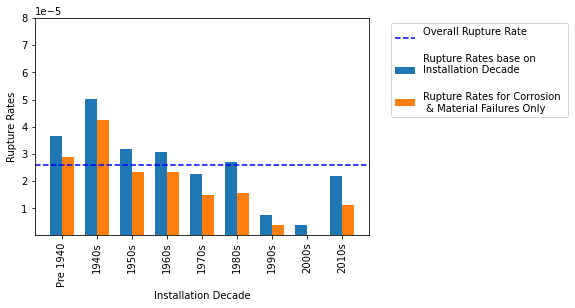

In [413]:
#Stacked bar graph

n = len(['Pre 1940', '1940s', '1950s', '1960s',
       '1970s', '1980s', '1990s', '2000s', '2010s'])
x = np.arange(n)  # the label locations
width = 0.35

fig, ax = plt.subplots()

labels = ['Pre 1940', '1940s', '1950s', '1960s',
       '1970s', '1980s', '1990s', '2000s', '2010s']

values = incident_installation_average[['Pre 1940_rate', '1940s_rate', '1950s_rate', '1960s_rate',
       '1970s_rate', '1980s_rate', '1990s_rate', '2000s_rate', '2010s_rate']]
values_corr_mat = incident_installation_corr_mat_average[['Pre 1940_rate', '1940s_rate', '1950s_rate', '1960s_rate',
       '1970s_rate', '1980s_rate', '1990s_rate', '2000s_rate', '2010s_rate']]

a = ax.bar(x, values.values , width ) 
b = ax.axhline(y=incident_total_average['Total_rate'] , color='b', linestyle='--')
c = ax.bar(x + width, values_corr_mat.values , width ) 

b.set_label('Overall Rupture Rate\n')
a.set_label('Rupture Rates base on\nInstallation Decade\n')
c.set_label('Rupture Rates for Corrosion \n & Material Failures Only')

#xticks 
#plt.xticks(rotation=90) 
plt.xticks(x + width/2, labels, rotation = 90)

#x-axis labels 
plt.xlabel('Installation Decade') 



#y-axis labels 
plt.ylabel('Rupture Rates') 
plt.ylim(bottom = 0.0000001, top=0.00008)
plt.ticklabel_format(axis= 'y', style = 'sci', scilimits=(0,0))


#plot title 
#plt.title('Ditribution of Incidents by Installation Year') 

#Legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

#adding Percentage values on the graph
#plt.xticks(rotation=90)  
#for n in a:
   #height = n.get_height()
   #plt.text(x=n.get_x() + n.get_width() / 2, y=height+.70, s="{}%".format(height), ha='center')

#save plot 
plot_path = os.getcwd() + '\\GT Rates Plots\\installation_rates'
plt.savefig(plot_path, dpi=300,bbox_inches='tight')         
        
#display 
plt.show();

In [246]:
#calculating rupture rates based on class
incident_class = pd.DataFrame()

#Total incidents
for n in range(0, 11):
    incident_class= incident_class.append({'Year': 2010+n, 'Class 1': len(incident_df.loc[(incident_df['CLASS_LOCATION_TYPE'] == 'CLASS 1 LOCATION') & (incident_df['IYEAR'] == 2010+n)]), 
                                            'Class 2': len(incident_df.loc[(incident_df['CLASS_LOCATION_TYPE'] == 'CLASS 2 LOCATION') & (incident_df['IYEAR'] == 2010+n)]), 
                                           'Class 3': len(incident_df.loc[(incident_df['CLASS_LOCATION_TYPE'] == 'CLASS 3 LOCATION') & (incident_df['IYEAR'] == 2010+n)]), 
                                           'Class 4': len(incident_df.loc[(incident_df['CLASS_LOCATION_TYPE'] == 'CLASS 4 LOCATION') & (incident_df['IYEAR'] == 2010+n)])}, ignore_index=True) 


In [313]:
#calculating rupture rates based on class adn excavation
incident_class_exc = pd.DataFrame()

#Total incidents
for n in range(0, 11):
    incident_class_exc= incident_class_exc.append({'Year': 2010+n, 
                                                   'Class 1': len(incident_df.loc[(incident_df['CLASS_LOCATION_TYPE'] == 'CLASS 1 LOCATION') & (incident_df['MAP_CAUSE'] == 'EXCAVATION DAMAGE') & (incident_df['IYEAR'] == 2010+n)]), 
                                            'Class 2': len(incident_df.loc[(incident_df['CLASS_LOCATION_TYPE'] == 'CLASS 2 LOCATION') & (incident_df['MAP_CAUSE'] == 'EXCAVATION DAMAGE') & (incident_df['IYEAR'] == 2010+n)]), 
                                           'Class 3': len(incident_df.loc[(incident_df['CLASS_LOCATION_TYPE'] == 'CLASS 3 LOCATION') & (incident_df['MAP_CAUSE'] == 'EXCAVATION DAMAGE') & (incident_df['IYEAR'] == 2010+n)]), 
                                           'Class 4': len(incident_df.loc[(incident_df['CLASS_LOCATION_TYPE'] == 'CLASS 4 LOCATION') & (incident_df['MAP_CAUSE'] == 'EXCAVATION DAMAGE') & (incident_df['IYEAR'] == 2010+n)])}, ignore_index=True) 


In [247]:
incident_class = incident_class.set_index('Year')

In [314]:
incident_class_exc = incident_class_exc.set_index('Year')

In [248]:
incident_class['Class 1_rate'] = incident_class['Class 1']/mileage_df['PARTLTONC1']
incident_class['Class 2_rate'] = incident_class['Class 2']/mileage_df['PARTLTONC2']
incident_class['Class 3_rate'] = incident_class['Class 3']/mileage_df['PARTLTONC3']
incident_class['Class 4_rate'] = incident_class['Class 4']/mileage_df['PARTLTONC4']

In [315]:
incident_class_exc['Class 1_rate'] = incident_class_exc['Class 1']/mileage_df['PARTLTONC1']
incident_class_exc['Class 2_rate'] = incident_class_exc['Class 2']/mileage_df['PARTLTONC2']
incident_class_exc['Class 3_rate'] = incident_class_exc['Class 3']/mileage_df['PARTLTONC3']
incident_class_exc['Class 4_rate'] = incident_class_exc['Class 4']/mileage_df['PARTLTONC4']

In [249]:
incident_class_average = incident_class.mean(0)

In [316]:
incident_class_exc_average = incident_class_exc.mean(0)

In [250]:
incident_class_average.index

Index(['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 1_rate',
       'Class 2_rate', 'Class 3_rate', 'Class 4_rate'],
      dtype='object')

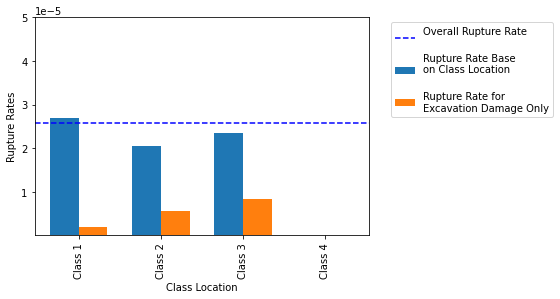

In [414]:
#Stacked bar graph

n = len(['Class 1_rate',
       'Class 2_rate', 'Class 3_rate', 'Class 4_rate'])
x = np.arange(n)  # the label locations
width = 0.35

fig, ax = plt.subplots()

labels = ['Class 1',
       'Class 2', 'Class 3', 'Class 4']

values = incident_class_average[['Class 1_rate',
       'Class 2_rate', 'Class 3_rate', 'Class 4_rate']]
values_exc = incident_class_exc_average[['Class 1_rate',
       'Class 2_rate', 'Class 3_rate', 'Class 4_rate']]

a = ax.bar(x, values.values , width ) 
b = ax.axhline(y=incident_total_average['Total_rate'] , color='b', linestyle='--')
c = ax.bar(x +width, values_exc.values , width ) 

b.set_label('Overall Rupture Rate\n')
a.set_label('Rupture Rate Base \non Class Location\n')
c.set_label('Rupture Rate for \nExcavation Damage Only')

#xticks 
#plt.xticks(rotation=90) 
plt.xticks(x+width/2, labels, rotation=90) 

#x-axis labels 
plt.xlabel('Class Location') 


#y-axis labels 
plt.ylabel('Rupture Rates') 
plt.ylim(bottom = 0.0000001, top=0.00005)
plt.ticklabel_format(axis= 'y', style = 'sci', scilimits=(0,0))


#plot title 
#plt.title('Ditribution of Incidents by Installation Year') 

#Legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

#adding Percentage values on the graph
#plt.xticks(rotation=90)  
#for n in a:
   #height = n.get_height()
   #plt.text(x=n.get_x() + n.get_width() / 2, y=height+.70, s="{}%".format(height), ha='center')

#save plot 
plot_path = os.getcwd() + '\\GT Rates Plots\\class_rates'
plt.savefig(plot_path, dpi=300,bbox_inches='tight')         
        
#display 
plt.show();

In [312]:
incident_class_average[['Class 1_rate',
       'Class 2_rate', 'Class 3_rate', 'Class 4_rate']]

Class 1_rate    0.000027
Class 2_rate    0.000020
Class 3_rate    0.000024
Class 4_rate    0.000000
dtype: float64

In [240]:
#calculating rupture rates based on diameter
incident_diameter = pd.DataFrame()

#Total incidents
for n in range(0, 11):
    incident_diameter= incident_diameter.append({'Year': 2010+n, 'd<=4': len(incident_df.loc[(incident_df['Diameter_Range'] == 'd<=4') & (incident_df['IYEAR'] == 2010+n)]), 
                                            '4<d<=10': len(incident_df.loc[(incident_df['Diameter_Range'] == '4<d<=10') & (incident_df['IYEAR'] == 2010+n)]), 
                                           '10<d<=20': len(incident_df.loc[(incident_df['Diameter_Range'] == '10<d<=20') & (incident_df['IYEAR'] == 2010+n)]), 
                                           '20<d<=28': len(incident_df.loc[(incident_df['Diameter_Range'] == '20<d<=28') & (incident_df['IYEAR'] == 2010+n)]), 
                                                '28<d': len(incident_df.loc[(incident_df['Diameter_Range'] == '28<d') & (incident_df['IYEAR'] == 2010+n)])}, ignore_index=True) 


In [241]:
incident_diameter = incident_diameter.set_index('Year')

In [242]:
incident_diameter['d<=4_rate'] = incident_diameter['d<=4']/mileage_df['d<=4']
incident_diameter['4<d<=10_rate'] = incident_diameter['4<d<=10']/mileage_df['4<d<=10']
incident_diameter['10<d<=20_rate'] = incident_diameter['10<d<=20']/mileage_df['10<d<=20']
incident_diameter['20<d<=28_rate'] = incident_diameter['20<d<=28']/mileage_df['20<d<=28']
incident_diameter['28<d_rate'] = incident_diameter['28<d']/mileage_df['28<d']

In [243]:
incident_diameter_average = incident_diameter.mean(0)

In [394]:
incident_diameter_average[['d<=4_rate',
       '4<d<=10_rate', '10<d<=20_rate', '20<d<=28_rate', '28<d_rate']]

d<=4_rate        0.000016
4<d<=10_rate     0.000023
10<d<=20_rate    0.000042
20<d<=28_rate    0.000021
28<d_rate        0.000016
dtype: float64

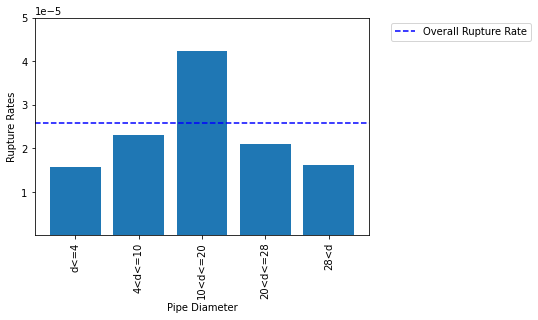

In [408]:
#Stacked bar graph

windth = 10
fig, ax = plt.subplots()

labels = ['d<=4',
       '4<d<=10', '10<d<=20', '20<d<=28', '28<d']

values = incident_diameter_average[['d<=4_rate',
       '4<d<=10_rate', '10<d<=20_rate', '20<d<=28_rate', '28<d_rate']]

a = ax.bar(labels, values.values , align = 'center' ) 
b = ax.axhline(y=incident_total_average['Total_rate'] , color='b', linestyle='--')

b.set_label('Overall Rupture Rate')

#xticks 
plt.xticks(rotation=90) 

#x-axis labels 
plt.xlabel('Pipe Diameter') 


#y-axis labels 
plt.ylabel('Rupture Rates') 
plt.ylim(bottom = 0.0000001, top=0.00005)
plt.ticklabel_format(axis= 'y', style = 'sci', scilimits=(0,0))


#plot title 
#plt.title('Ditribution of Incidents by Installation Year') 

#Legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

#adding Percentage values on the graph
#plt.xticks(rotation=90)  
#for n in a:
   #height = n.get_height()
   #plt.text(x=n.get_x() + n.get_width() / 2, y=height+.70, s="{}%".format(height), ha='center')

#save plot 
plot_path = os.getcwd() + '\\GT Rates Plots\\diameter_rates'
plt.savefig(plot_path, dpi=300,bbox_inches='tight')         
        
#display 
plt.show();

In [252]:
#calculating rupture rates based on smys
incident_smys = pd.DataFrame()

#Total incidents
for n in range(0, 11):
    incident_smys= incident_smys.append({'Year': 2010+n, 'Less than 20%': len(incident_df.loc[(incident_df['SMYS_Cat'] == 'Less than 20%') & (incident_df['IYEAR'] == 2010+n)]), 
                                            '20%-30%': len(incident_df.loc[(incident_df['SMYS_Cat'] == '20%-30%') & (incident_df['IYEAR'] == 2010+n)]), 
                                           '30%-40%': len(incident_df.loc[(incident_df['SMYS_Cat'] == '30%-40%') & (incident_df['IYEAR'] == 2010+n)]), 
                                           '40%-50%': len(incident_df.loc[(incident_df['SMYS_Cat'] == '40%-50%') & (incident_df['IYEAR'] == 2010+n)]), 
                                            '50%-60%': len(incident_df.loc[(incident_df['SMYS_Cat'] == '50%-60%') & (incident_df['IYEAR'] == 2010+n)]), 
                                            '60%-72%': len(incident_df.loc[(incident_df['SMYS_Cat'] == '60%-72%') & (incident_df['IYEAR'] == 2010+n)]), 
                                            '72%-80%': len(incident_df.loc[(incident_df['SMYS_Cat'] == '72%-80%') & (incident_df['IYEAR'] == 2010+n)]), 
                                            'Greater than 80%': len(incident_df.loc[(incident_df['SMYS_Cat'] == 'Greater than 80%') & (incident_df['IYEAR'] == 2010+n)])}, ignore_index=True) 


In [320]:
#calculating rupture rates based on smys
incident_smys_corr_mat = pd.DataFrame()

#Total incidents
for n in range(0, 11):
    incident_smys_corr_mat= incident_smys_corr_mat.append({'Year': 2010+n, 
                                                                 'Less than 20%': len(incident_df.loc[(incident_df['SMYS_Cat'] == 'Less than 20%') & ((incident_df['MAP_CAUSE'] == 'MATERIAL/WELD/EQUIP FAILURE') | (incident_df['MAP_CAUSE'] == 'CORROSION')) & (incident_df['IYEAR'] == 2010+n)]), 
                                            '20%-30%': len(incident_df.loc[(incident_df['SMYS_Cat'] == '20%-30%') & ((incident_df['MAP_CAUSE'] == 'MATERIAL/WELD/EQUIP FAILURE') | (incident_df['MAP_CAUSE'] == 'CORROSION')) & (incident_df['IYEAR'] == 2010+n)]), 
                                           '30%-40%': len(incident_df.loc[(incident_df['SMYS_Cat'] == '30%-40%') & ((incident_df['MAP_CAUSE'] == 'MATERIAL/WELD/EQUIP FAILURE') | (incident_df['MAP_CAUSE'] == 'CORROSION')) & (incident_df['IYEAR'] == 2010+n)]), 
                                           '40%-50%': len(incident_df.loc[(incident_df['SMYS_Cat'] == '40%-50%') & ((incident_df['MAP_CAUSE'] == 'MATERIAL/WELD/EQUIP FAILURE') | (incident_df['MAP_CAUSE'] == 'CORROSION')) & (incident_df['IYEAR'] == 2010+n)]), 
                                            '50%-60%': len(incident_df.loc[(incident_df['SMYS_Cat'] == '50%-60%') & ((incident_df['MAP_CAUSE'] == 'MATERIAL/WELD/EQUIP FAILURE') | (incident_df['MAP_CAUSE'] == 'CORROSION')) & (incident_df['IYEAR'] == 2010+n)]), 
                                            '60%-72%': len(incident_df.loc[(incident_df['SMYS_Cat'] == '60%-72%') & ((incident_df['MAP_CAUSE'] == 'MATERIAL/WELD/EQUIP FAILURE') | (incident_df['MAP_CAUSE'] == 'CORROSION')) & (incident_df['IYEAR'] == 2010+n)]), 
                                            '72%-80%': len(incident_df.loc[(incident_df['SMYS_Cat'] == '72%-80%') & ((incident_df['MAP_CAUSE'] == 'MATERIAL/WELD/EQUIP FAILURE') | (incident_df['MAP_CAUSE'] == 'CORROSION')) & (incident_df['IYEAR'] == 2010+n)]), 
                                            'Greater than 80%': len(incident_df.loc[(incident_df['SMYS_Cat'] == 'Greater than 80%') & ((incident_df['MAP_CAUSE'] == 'MATERIAL/WELD/EQUIP FAILURE') | (incident_df['MAP_CAUSE'] == 'CORROSION')) & (incident_df['IYEAR'] == 2010+n)])}, ignore_index=True) 


In [330]:
incident_smys = incident_smys.set_index('Year')
incident_smys 

,20%-30%,30%-40%,40%-50%,50%-60%,60%-72%,72%-80%,Greater than 80%,Less than 20%,Less than 20%_rate,20%-30%_rate,30%-40%_rate,40%-50%_rate,50%-60%_rate,60%-72%_rate,72%-80%_rate,Greater than 80%_rate
Year,,,,,,,,,,,,,,,,
2010.0,0.0,1.0,6.0,2.0,4.0,0.0,0.0,0.0,0.000000,0.000000,0.000020,0.000084,0.000028,0.000023,0.000000,0.0
2011.0,2.0,1.0,1.0,2.0,6.0,0.0,0.0,1.0,0.000032,0.000045,0.000019,0.000014,0.000027,0.000033,0.000000,0.0
2012.0,1.0,3.0,3.0,2.0,7.0,1.0,0.0,0.0,0.000000,0.000022,0.000058,0.000040,0.000027,0.000042,0.000052,0.0
2013.0,1.0,1.0,3.0,3.0,3.0,2.0,0.0,2.0,0.000066,0.000022,0.000020,0.000040,0.000040,0.000018,0.000104,0.0
2014.0,2.0,1.0,3.0,3.0,3.0,1.0,0.0,0.0,0.000000,0.000044,0.000019,0.000040,0.000039,0.000018,0.000062,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016.0,1.0,0.0,1.0,4.0,2.0,0.0,0.0,0.0,0.000000,0.000023,0.000000,0.000013,0.000054,0.000011,0.000000,0.0
2017.0,1.0,0.0,1.0,1.0,4.0,0.0,0.0,0.0,0.000000,0.000023,0.000000,0.000013,0.000013,0.000023,0.000000,0.0
2018.0,0.0,0.0,1.0,3.0,4.0,2.0,0.0,1.0,0.000031,0.000000,0.000000,0.000013,0.000040,0.000023,0.000125,0.0


In [326]:
incident_smys_corr_mat = incident_smys_corr_mat.set_index('Year')
incident_smys_corr_mat

,20%-30%,30%-40%,40%-50%,50%-60%,60%-72%,72%-80%,Greater than 80%,Less than 20%,Less than 20%_rate,20%-30%_rate,30%-40%_rate,40%-50%_rate,50%-60%_rate,60%-72%_rate,72%-80%_rate,Greater than 80%_rate
Year,,,,,,,,,,,,,,,,
2010.0,0.0,0.0,6.0,2.0,3.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000084,0.000028,0.000017,0.000000,0.0
2011.0,0.0,0.0,1.0,2.0,4.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000014,0.000027,0.000022,0.000000,0.0
2012.0,1.0,2.0,3.0,1.0,7.0,0.0,0.0,0.0,0.00000,0.000022,0.000038,0.000040,0.000013,0.000042,0.000000,0.0
2013.0,1.0,1.0,2.0,3.0,2.0,2.0,0.0,0.0,0.00000,0.000022,0.000020,0.000026,0.000040,0.000012,0.000104,0.0
2014.0,0.0,1.0,1.0,3.0,3.0,1.0,0.0,0.0,0.00000,0.000000,0.000019,0.000013,0.000039,0.000018,0.000062,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016.0,0.0,0.0,1.0,3.0,1.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000013,0.000040,0.000006,0.000000,0.0
2017.0,1.0,0.0,1.0,1.0,4.0,0.0,0.0,0.0,0.00000,0.000023,0.000000,0.000013,0.000013,0.000023,0.000000,0.0
2018.0,0.0,0.0,0.0,1.0,3.0,2.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.000013,0.000017,0.000125,0.0


In [254]:
incident_smys['Less than 20%_rate'] = incident_smys['Less than 20%']/mileage_df['PARTK20LESSTOT']
incident_smys['20%-30%_rate'] = incident_smys['20%-30%']/mileage_df['PARTK2029TOT']
incident_smys['30%-40%_rate'] = incident_smys['30%-40%']/mileage_df['PARTK3040TOT']
incident_smys['40%-50%_rate'] = incident_smys['40%-50%']/mileage_df['PARTK4150TOT']
incident_smys['50%-60%_rate'] = incident_smys['50%-60%']/mileage_df['PARTK5160TOT']
incident_smys['60%-72%_rate'] = incident_smys['60%-72%']/mileage_df['PARTK6172TOT']
incident_smys['72%-80%_rate'] = incident_smys['72%-80%']/mileage_df['PARTK7380TOT']
incident_smys['Greater than 80%_rate'] = incident_smys['Greater than 80%']/mileage_df['PARTK80MORETOT']

In [327]:
incident_smys_corr_mat['Less than 20%_rate'] = incident_smys_corr_mat['Less than 20%']/mileage_df['PARTK20LESSTOT']
incident_smys_corr_mat['20%-30%_rate'] = incident_smys_corr_mat['20%-30%']/mileage_df['PARTK2029TOT']
incident_smys_corr_mat['30%-40%_rate'] = incident_smys_corr_mat['30%-40%']/mileage_df['PARTK3040TOT']
incident_smys_corr_mat['40%-50%_rate'] = incident_smys_corr_mat['40%-50%']/mileage_df['PARTK4150TOT']
incident_smys_corr_mat['50%-60%_rate'] = incident_smys_corr_mat['50%-60%']/mileage_df['PARTK5160TOT']
incident_smys_corr_mat['60%-72%_rate'] = incident_smys_corr_mat['60%-72%']/mileage_df['PARTK6172TOT']
incident_smys_corr_mat['72%-80%_rate'] = incident_smys_corr_mat['72%-80%']/mileage_df['PARTK7380TOT']
incident_smys_corr_mat['Greater than 80%_rate'] = incident_smys_corr_mat['Greater than 80%']/mileage_df['PARTK80MORETOT']

In [255]:
incident_smys_average = incident_smys.mean(0)

In [333]:
incident_smys_corr_mat_average = incident_smys_corr_mat.mean(0)

In [332]:
incident_smys_average

20%-30%                  1.090909
30%-40%                  0.818182
40%-50%                  2.090909
50%-60%                  2.636364
60%-72%                  4.000000
                           ...   
40%-50%_rate             0.000028
50%-60%_rate             0.000035
60%-72%_rate             0.000023
72%-80%_rate             0.000043
Greater than 80%_rate    0.000000
Length: 16, dtype: float64

In [334]:
incident_smys_corr_mat_average

20%-30%                  0.545455
30%-40%                  0.545455
40%-50%                  1.454545
50%-60%                  2.090909
60%-72%                  3.090909
                           ...   
40%-50%_rate             0.000020
50%-60%_rate             0.000028
60%-72%_rate             0.000018
72%-80%_rate             0.000038
Greater than 80%_rate    0.000000
Length: 16, dtype: float64

In [395]:
incident_smys_average[['Less than 20%_rate',
       '20%-30%_rate', '30%-40%_rate', '40%-50%_rate', '50%-60%_rate',
       '60%-72%_rate', '72%-80%_rate', 'Greater than 80%_rate']]

Less than 20%_rate       0.000023
20%-30%_rate             0.000025
30%-40%_rate             0.000016
40%-50%_rate             0.000028
50%-60%_rate             0.000035
60%-72%_rate             0.000023
72%-80%_rate             0.000043
Greater than 80%_rate    0.000000
dtype: float64

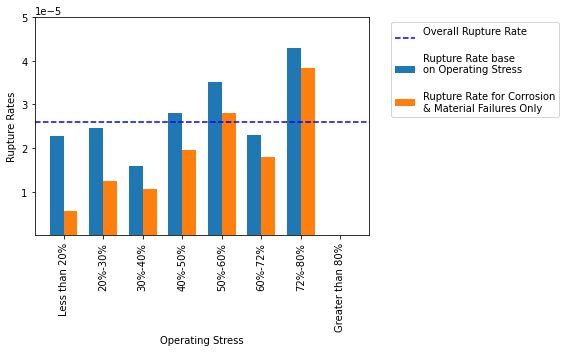

In [415]:
#Stacked bar graph

n = len(['Less than 20%_rate',
       '20%-30%_rate', '30%-40%_rate', '40%-50%_rate', '50%-60%_rate',
       '60%-72%_rate', '72%-80%_rate', 'Greater than 80%_rate'])
x = np.arange(n)  # the label locations
width = 0.35

fig, ax = plt.subplots()

labels = ['Less than 20%',
       '20%-30%', '30%-40%', '40%-50%', '50%-60%',
       '60%-72%', '72%-80%', 'Greater than 80%']

values = incident_smys_average[['Less than 20%_rate',
       '20%-30%_rate', '30%-40%_rate', '40%-50%_rate', '50%-60%_rate',
       '60%-72%_rate', '72%-80%_rate', 'Greater than 80%_rate']]

values_corr_mat = incident_smys_corr_mat_average[['Less than 20%_rate',
       '20%-30%_rate', '30%-40%_rate', '40%-50%_rate', '50%-60%_rate',
       '60%-72%_rate', '72%-80%_rate', 'Greater than 80%_rate']]

a = ax.bar(x, values.values , width) 
b = ax.axhline(y=incident_total_average['Total_rate'] , color='b', linestyle='--')
c = ax.bar(x + width, values_corr_mat.values , width) 

b.set_label('Overall Rupture Rate\n')
a.set_label('Rupture Rate base \non Operating Stress\n')
c.set_label('Rupture Rate for Corrosion\n& Material Failures Only')

#xticks 
#plt.xticks(rotation=90) 
plt.xticks(x + width/2, labels, rotation=90) 

#x-axis labels 
plt.xlabel('Operating Stress') 


#y-axis labels 
plt.ylabel('Rupture Rates') 
plt.ylim(bottom = 0.0000001, top=0.00005)
plt.ticklabel_format(axis= 'y', style = 'sci', scilimits=(0,0))


#plot title 
#plt.title('Ditribution of Incidents by Installation Year') 

#Legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

#adding Percentage values on the graph
#plt.xticks(rotation=90)  
#for n in a:
   #height = n.get_height()
   #plt.text(x=n.get_x() + n.get_width() / 2, y=height+.70, s="{}%".format(height), ha='center')

#save plot 
plot_path = os.getcwd() + '\\GT Rates Plots\\smys_rates'
plt.savefig(plot_path, dpi=300,bbox_inches='tight')         
        
#display 
plt.show();

In [275]:
#calculating rupture rates based on commodity
incident_commodity = pd.DataFrame()

#Total incidents
for n in range(0, 11):
    incident_commodity= incident_commodity.append({'Year': 2010+n, 
                                                   'Natural Gas': len(incident_df.loc[(incident_df['COMMODITY_RELEASED_TYPE'] == 'NATURAL GAS') & (incident_df['IYEAR'] == 2010+n)]), 
                                            'Other Gas': len(incident_df.loc[(incident_df['COMMODITY_RELEASED_TYPE'] == 'OTHER GAS') & (incident_df['IYEAR'] == 2010+n)]), 
                                                  'Unknown': len(incident_df.loc[(incident_df['COMMODITY_RELEASED_TYPE'] == 'Unknown') & (incident_df['IYEAR'] == 2010+n)])}, ignore_index=True) 


In [276]:
# only other gas incident is in 2020 which is not included
incident_commodity = incident_commodity.set_index('Year')
incident_commodity 

,Natural Gas,Other Gas,Unknown
Year,,,
2010.0,13.0,0.0,0.0
2011.0,13.0,0.0,0.0
2012.0,16.0,0.0,1.0
2013.0,15.0,0.0,0.0
2014.0,13.0,0.0,0.0
...,...,...,...
2016.0,9.0,0.0,0.0
2017.0,7.0,0.0,0.0
2018.0,11.0,0.0,0.0


In [277]:
incident_commodity['Natural Gas_rate'] = incident_commodity['Natural Gas']/mileage_df['Natural Gas']
incident_commodity['Other Gas_rate'] = (incident_commodity['Other Gas']+incident_commodity['Unknown'])/(mileage_df['Propane Gas']+mileage_df['Synthetic Gas']+mileage_df['Landfill Gas']+mileage_df['Hydrogen Gas']+mileage_df['Other'])

In [278]:
incident_commodity_average = incident_commodity.mean(0)
incident_commodity_average

Natural Gas         12.181818
Other Gas            0.090909
Unknown              0.090909
Natural Gas_rate     0.000026
Other Gas_rate       0.000057
dtype: float64

In [338]:
(mileage_df['Propane Gas']+mileage_df['Synthetic Gas']+mileage_df['Landfill Gas']+mileage_df['Hydrogen Gas']+mileage_df['Other']).mean(0)

3182.3636363636365

In [340]:
mileage_df['Natural Gas'].mean(0)/478239

0.9897645319599614

In [279]:
incident_commodity_average.index

Index(['Natural Gas', 'Other Gas', 'Unknown', 'Natural Gas_rate',
       'Other Gas_rate'],
      dtype='object')

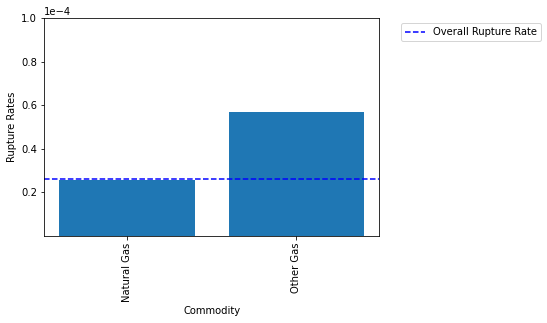

In [410]:
#Stacked bar graph

windth = 10
fig, ax = plt.subplots()

labels = ['Natural Gas', 'Other Gas']

values = incident_commodity_average[['Natural Gas_rate', 'Other Gas_rate']]

a = ax.bar(labels, values.values , align = 'center' ) 
b = ax.axhline(y=incident_total_average['Total_rate'] , color='b', linestyle='--')

b.set_label('Overall Rupture Rate')

#xticks 
plt.xticks(rotation=90) 

#x-axis labels 
plt.xlabel('Commodity') 


#y-axis labels 
plt.ylabel('Rupture Rates') 
plt.ylim(bottom = 0.0000001, top=0.0001)
plt.ticklabel_format(axis= 'y', style = 'sci', scilimits=(0,0))


#plot title 
#plt.title('Ditribution of Incidents by Installation Year') 

#Legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

#adding Percentage values on the graph
#plt.xticks(rotation=90)  
#for n in a:
   #height = n.get_height()
   #plt.text(x=n.get_x() + n.get_width() / 2, y=height+.70, s="{}%".format(height), ha='center')

#save plot 
plot_path = os.getcwd() + '\\GT Rates Plots\\commodity_rates'
plt.savefig(plot_path, dpi=300,bbox_inches='tight')         
        
#display 
plt.show();

In [396]:
incident_commodity_average[['Natural Gas_rate', 'Other Gas_rate']]

Natural Gas_rate    0.000026
Other Gas_rate      0.000057
dtype: float64